# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | sungai penuh
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mumbwa
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | songadh
Processing Record 8 of Set 1 | peace river
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | motueka
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | san antonio de pale
Processing Record 16 of Set 1 | marsaskala
City not found. Skipping...
Processing Record 17 of Set 1 | tamanrasset
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | inebolu
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | carna

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,69,84,4.12,CC,1722877047
1,sungai penuh,-2.0833,101.3833,17.85,95,89,2.39,ID,1722877048
2,ilulissat,69.2167,-51.1000,7.05,63,5,1.29,GL,1722877003
3,port-aux-francais,-49.3500,70.2167,0.72,68,20,4.11,TF,1722876996
4,mumbwa,-14.9783,27.0619,22.40,13,1,1.30,ZM,1722877052


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,69,84,4.12,CC,1722877047
1,sungai penuh,-2.0833,101.3833,17.85,95,89,2.39,ID,1722877048
2,ilulissat,69.2167,-51.1000,7.05,63,5,1.29,GL,1722877003
3,port-aux-francais,-49.3500,70.2167,0.72,68,20,4.11,TF,1722876996
4,mumbwa,-14.9783,27.0619,22.40,13,1,1.30,ZM,1722877052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

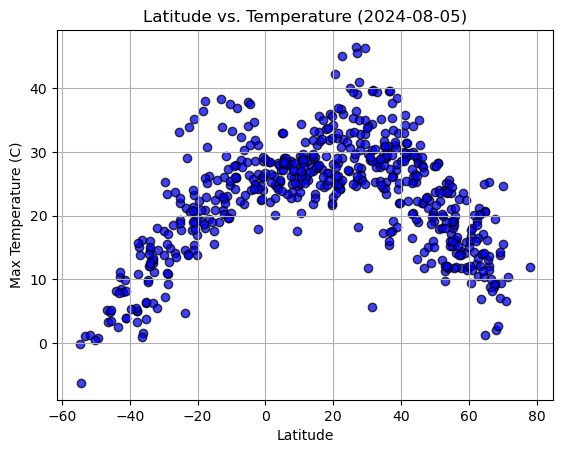

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Max Temp"], marker="o", facecolors="blue", edgecolors="black",
        alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"Latitude vs. Temperature (2024-08-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

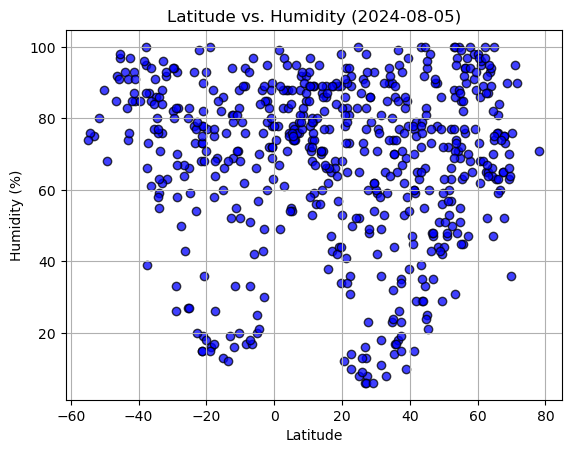

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Humidity"], marker="o", facecolors="blue", edgecolors="black",
        alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Latitude vs. Humidity (2024-08-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

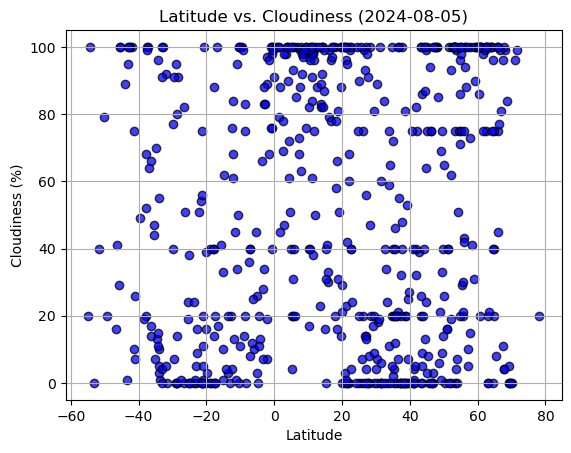

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Cloudiness"], marker="o", facecolors="blue", edgecolors="black",
        alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness (2024-08-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

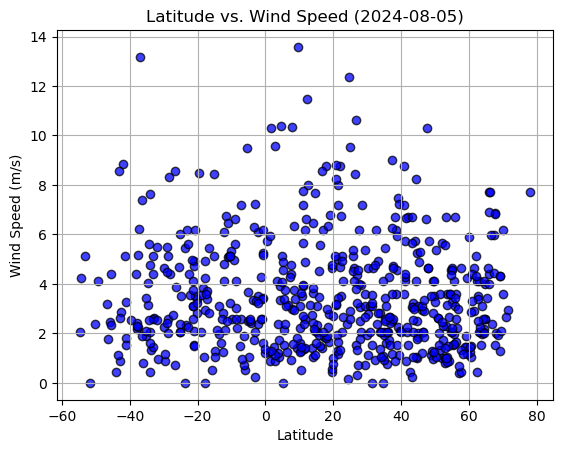

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Wind Speed"], marker="o", facecolors="blue", edgecolors="black",
        alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"Latitude vs. Wind Speed (2024-08-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def WeatherRegression(x_values, y_values, x_label, y_label, chart_title, coords):
    # Create tuple of stat values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Define regression line
    regress_values = x_values * slope + intercept

    # Create printable line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.title(chart_title)

    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")

    # Show plot
    plt.show()


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ilulissat,69.2167,-51.1000,7.05,63,5,1.29,GL,1722877003
5,yellowknife,62.4560,-114.3525,19.12,65,75,4.12,CA,1722877053
6,songadh,21.1667,73.5667,24.70,94,23,5.02,IN,1722877054
7,peace river,56.2501,-117.2860,14.17,94,100,3.60,CA,1722877055
8,isafjordur,66.0755,-23.1240,12.02,76,75,7.72,IS,1722877056


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,69,84,4.12,CC,1722877047
1,sungai penuh,-2.0833,101.3833,17.85,95,89,2.39,ID,1722877048
3,port-aux-francais,-49.3500,70.2167,0.72,68,20,4.11,TF,1722876996
4,mumbwa,-14.9783,27.0619,22.40,13,1,1.30,ZM,1722877052
9,lorengau,-2.0226,147.2712,26.52,85,97,3.52,PG,1722877058


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3626963603398711


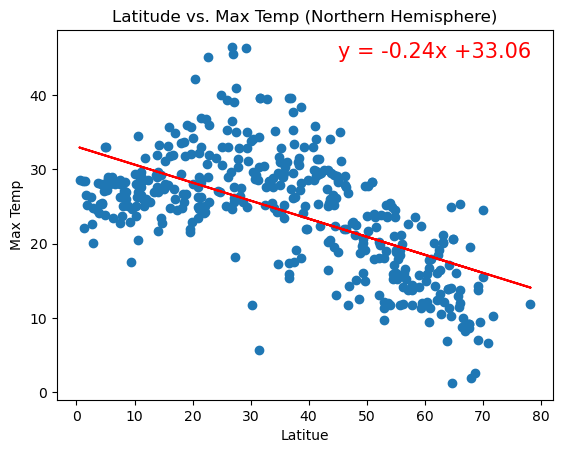

In [65]:
# Linear regression on Northern Hemisphere
WeatherRegression(northern_hemi_df.loc[:,'Lat'], northern_hemi_df.loc[:,'Max Temp'], 'Latitue', 'Max Temp', 'Latitude vs. Max Temp (Northern Hemisphere)', (45,45))

The r^2-value is: 0.688279073272043


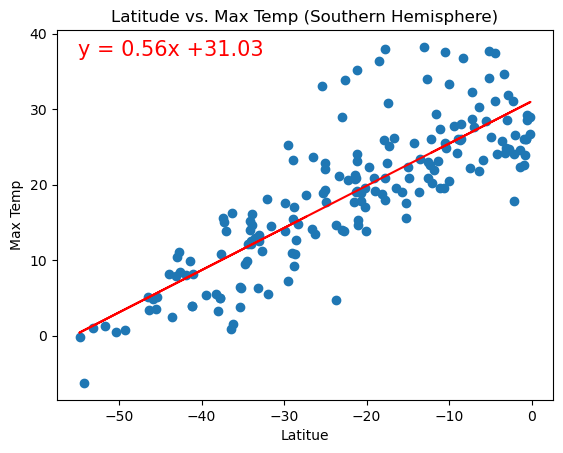

In [68]:
# Linear regression on Southern Hemisphere
WeatherRegression(southern_hemi_df.loc[:,'Lat'], southern_hemi_df.loc[:,'Max Temp'], 'Latitue', 'Max Temp', 'Latitude vs. Max Temp (Southern Hemisphere)', (-55,37))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


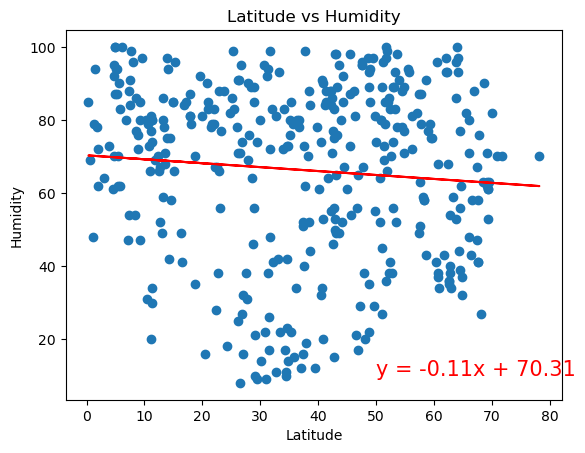

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


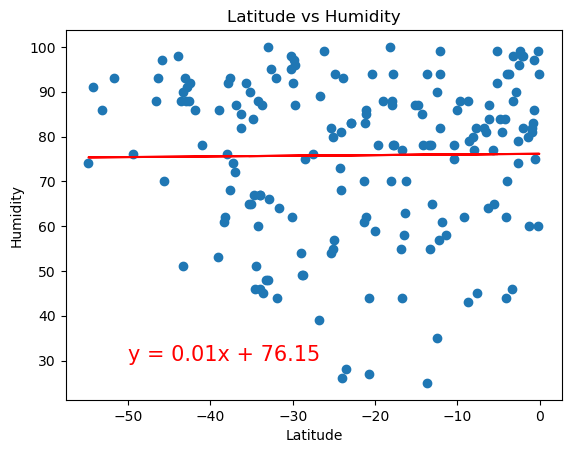

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


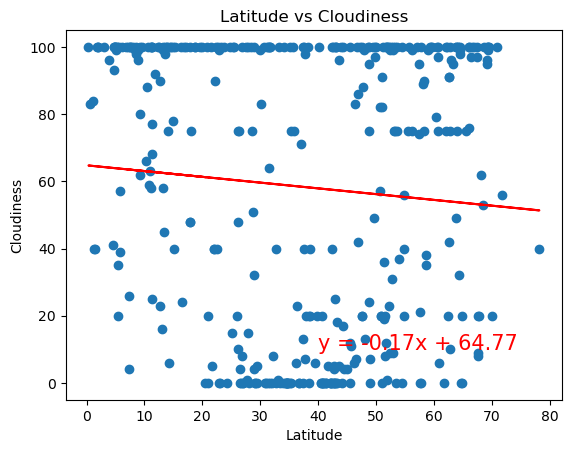

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


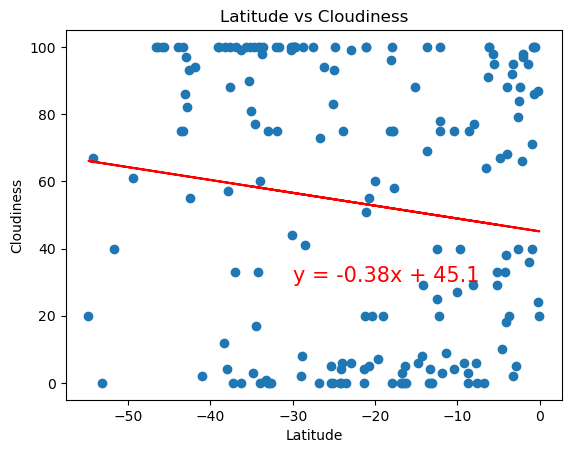

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


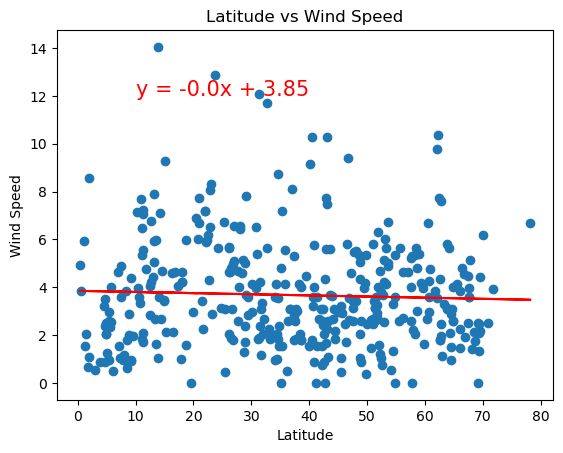

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


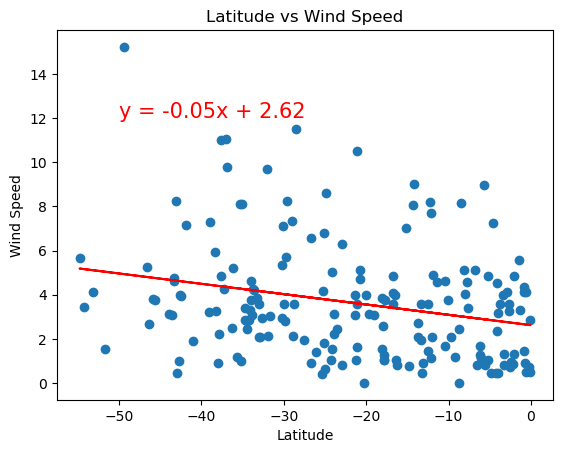

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE